In [2]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [3]:
import numpy as np
from chemgrid_game.plotting import plot_mols

from experiments.chemgrid_experiments.graph_search.search import GraphSearchExhaustive
from experiments.chemgrid_experiments.graph_search.search import GraphSearchHeuristic
from experiments.chemgrid_experiments.graph_search.search import GraphSearchRandom
from experiments.chemgrid_experiments.mol_graph import MolGraph
from experiments.chemgrid_experiments.new_chemistry.chemistry_wrapper import ChemistryWrapper
from experiments.chemgrid_experiments.new_chemistry.example import generate_initial_mols
from experiments.chemgrid_experiments.new_chemistry.utils import generate_random_mols

In [4]:
n_colors = 1
grid_size = 6
chemistry = ChemistryWrapper()
rng = np.random.default_rng(seed=0)

In [44]:
initial_mols = generate_initial_mols()
targets = generate_random_mols(initial_mols, n=10, n_steps=10000, rng=rng)

100%|██████████| 10000/10000 [00:18<00:00, 551.74it/s]


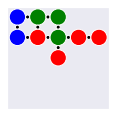

In [47]:
target = targets[1]
fig, ax = plot_mols(target, m=1, n=1, scale=0.3, background=True)

# Exhaustive

In [48]:
archive = MolGraph(initial_mols)
search = GraphSearchExhaustive(archive, chemistry=chemistry)
search.search(100000, target)

  3%|▎         | 3424/100000 [00:03<01:24, 1136.96it/s]


True

Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs


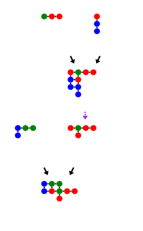

In [49]:
fig, ax = archive.plot_graph(hash(target))

# Random

In [50]:
archive = MolGraph(initial_mols)
search = GraphSearchRandom(archive, chemistry=chemistry)
search.search(100000, target)

100%|██████████| 100000/100000 [03:24<00:00, 487.98it/s]


False

In [51]:
fig, ax = archive.plot_graph(hash(target))

KeyError: 2248369775933557595

# Heuristic

In [52]:
archive = MolGraph(initial_mols)
search = GraphSearchHeuristic(archive, target, max_inventory_size=1000, chemistry=chemistry)
search.search(100000, target)

 61%|██████    | 60556/100000 [01:22<00:53, 734.27it/s] 


True

Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs


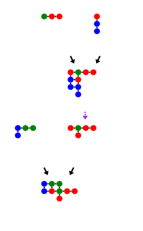

In [53]:
fig, ax = archive.plot_graph(hash(target))